In [1]:
import pandas as pd
import numpy as np

In [2]:
data_df = pd.read_csv('flare.data2', delim_whitespace = True, skiprows = [0], header = None)

In [3]:
data_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,H,A,X,1,3,1,1,1,1,1,0,0,0
1,D,R,O,1,3,1,1,2,1,1,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,H,R,X,1,2,1,1,1,1,1,0,0,0
4,H,S,X,1,1,1,1,2,1,1,0,0,0


In [4]:
print(data_df[2]) # return a column

0       X
1       O
2       O
3       X
4       X
       ..
1061    X
1062    X
1063    O
1064    X
1065    O
Name: 2, Length: 1066, dtype: object


In [5]:
print(data_df.iloc[1,2]) # return an element by index

O


In [6]:
print(data_df.iloc[:,0:10]) # return all rows and the first 10 columns

      0  1  2  3  4  5  6  7  8  9
0     H  A  X  1  3  1  1  1  1  1
1     D  R  O  1  3  1  1  2  1  1
2     C  S  O  1  3  1  1  2  1  1
3     H  R  X  1  2  1  1  1  1  1
4     H  S  X  1  1  1  1  2  1  1
...  .. .. .. .. .. .. .. .. .. ..
1061  H  S  X  1  2  1  1  1  1  1
1062  H  S  X  2  2  1  1  2  1  1
1063  C  S  O  1  2  1  2  2  1  1
1064  H  R  X  1  2  1  1  2  1  1
1065  B  X  O  1  1  1  1  2  1  1

[1066 rows x 10 columns]


In [7]:
# integer encoding for star class, spot size and spot distribution
classes = {'A':0, 'B':1, 'C':2, 'D':4, 'E':5, 'F':6, 'H':6}
spotSize = {'X':0, 'R':1, 'S':2, 'A':3, 'H':4, 'K':5}
spotDistribution = {'X':0, 'O':1, 'I':2, 'C':3}

In [8]:
data = np.empty((data_df.shape[0], data_df.shape[1])) # numpy array to hold numerical data

# for each row in the DataFrame
for i in range(data_df.shape[0]):
    data[i,0] = classes[data_df.iloc[i,0]]
    data[i,1] = spotSize[data_df.iloc[i,1]]
    data[i,2] = spotDistribution[data_df.iloc[i,2]]

    
data[:,3:] = data_df.iloc[:,3:]

# normalise the data columns
for i in range(data.shape[1]):
    data[:,i] = data[:,i]/data[:,i].sum()

# the first sample
print(data[10,:])

[0.00047125 0.00147638 0.00097276 0.00081301 0.00078125 0.00088574
 0.000668   0.0010005  0.00091491 0.00093809 0.         0.
 0.        ]


In [9]:
# split input and output data
x = data[:,:10]
y = data[:,10:]
# reshaping for consistency with matrix operations
x = x.reshape(len(x),10,1)
y = y.reshape(len(y),3,1)

In [10]:
print(x[0].shape)
print(y[0].shape)

(10, 1)
(3, 1)


In [11]:
# size of training dataset for an 80%/20% training/validation split 
n_training = int(len(data_df)*0.8)
# training and validation datasets
trainingData = [x[:n_training,:], y[:n_training,:]]
validationData = [x[n_training:,:], y[n_training:,:]]

In [12]:
print(trainingData[0].shape, trainingData[1].shape)
print(validationData[0].shape, validationData[1].shape)

(852, 10, 1) (852, 3, 1)
(214, 10, 1) (214, 3, 1)


In [13]:
%matplotlib inline
import sys
sys.path.append('../') # get python to look in the parent directory for modules
from ANN import *

In [18]:
inputLayer = InputLayer(10) 
dense1 = DenseLayer(10, 50, relu) 
dense2 = DenseLayer(50, 50, relu)
dense3 = DenseLayer(50, 50, relu)
dense4 = DenseLayer(50, 50, relu)
outputLayer = DenseLayer(50, 3, sigmoid)
 

layers = [inputLayer, dense1, dense2, dense3, dense4, outputLayer]

batchSize = 20
epochs = 10
learningRate = 1e-2

myNetwork = neuralNetwork(layers)

myNetwork.train(
        trainingData,
        validationData,
        batchSize,
        epochs,
        learningRate,
        MSE,
        shuffle = True)

Epoch:  0 of  10
Training Cost:  0.12539036945213006 Validation Cost:  0.12303546103619205
Epoch:  1 of  10
Training Cost:  0.028977815832721396 Validation Cost:  0.028810588881840914
Epoch:  2 of  10
Training Cost:  0.012126054199424455 Validation Cost:  0.012530350317204987
Epoch:  3 of  10
Training Cost:  0.0068659446787871226 Validation Cost:  0.007429940643042508
Epoch:  4 of  10
Training Cost:  0.004541728174340935 Validation Cost:  0.0051938318852781587
Epoch:  5 of  10
Training Cost:  0.003197132873317892 Validation Cost:  0.00400136265038191425
Epoch:  6 of  10
Training Cost:  0.0025955942568069413 Validation Cost:  0.0032786833133101496
Epoch:  7 of  10
Training Cost:  0.002017842863004084 Validation Cost:  0.00280361166393030763
Epoch:  8 of  10
Training Cost:  0.0016904954291458068 Validation Cost:  0.0024722101638642163
Epoch:  9 of  10
Training Cost:  0.0014423162588892355 Validation Cost:  0.0022303821065800763
Epoch:  10 of  10
Training Cost:  0.001235616444891262 Valid

Text(0.5, 0, 'Number of Batches (All Epochs)')

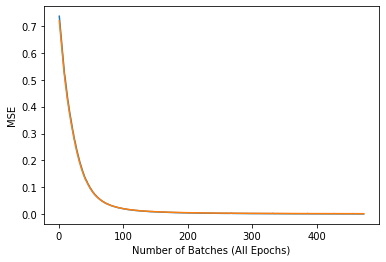

In [19]:
import matplotlib.pyplot as plt

plt.plot(myNetwork.batchPlot, myNetwork.trainingPlot)
plt.plot(myNetwork.batchPlot, myNetwork.validationPlot)
plt.ylabel('MSE')
plt.xlabel('Number of Batches (All Epochs)')


In [20]:
np.set_printoptions()
for x, y in zip(trainingData[0], trainingData[1]):
    if y.sum() > 0:
        print("y Expected: ", y.reshape(3))
        print("y Network:  ", np.round(myNetwork.forwardPass(x).reshape(3),6))
        print()

y Expected:  [0.003125 0.       0.      ]
y Network:   [0.025723 0.017504 0.017648]

y Expected:  [0.003125 0.       0.      ]
y Network:   [0.025719 0.017501 0.017646]

y Expected:  [0.015625 0.       0.      ]
y Network:   [0.025721 0.017501 0.017645]

y Expected:  [0.00625 0.      0.     ]
y Network:   [0.025726 0.017507 0.017651]

y Expected:  [0.009375 0.02     0.      ]
y Network:   [0.02572  0.017502 0.017649]

y Expected:  [0.003125 0.       0.      ]
y Network:   [0.025727 0.017504 0.017646]

y Expected:  [0.003125 0.       0.      ]
y Network:   [0.025725 0.017504 0.017647]

y Expected:  [0.00625 0.      0.     ]
y Network:   [0.025735 0.017512 0.017656]

y Expected:  [0.025 0.    0.   ]
y Network:   [0.025727 0.017507 0.017652]

y Expected:  [0.00625 0.      0.     ]
y Network:   [0.025734 0.017508 0.017652]

y Expected:  [0.015625 0.       0.      ]
y Network:   [0.025735 0.01751  0.017652]

y Expected:  [0.0125 0.08   0.    ]
y Network:   [0.025733 0.01751  0.017654]

y Ex